# Tarea 1 Análisis de Datos

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpdates
import datetime
import pandas as pd
import geopandas as gpd


#

In [2]:

df1 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto74/paso_a_paso_std.csv', 
                     encoding='utf-8',
                    sep=',')

df2=gpd.read_file('https://opendata.arcgis.com/datasets/1c64fcb18f5a41e088b25ef9f42b58d7_0.geojson') # contiene población de cada comuna

In [3]:
pd.set_option("display.max_columns", None)  #se quitan límites del display de dataframes
pd.set_option("display.max_rows", None)

# DF1

In [4]:
#se limpia y moldea el df1 por conveniencia

df1['Fecha']=pd.to_datetime(df1['Fecha'])
df1=df1.rename(columns={'codigo_region': 'cod_region','region_residencia':'region','codigo_comuna':'cod_comuna',
                      'comuna_residencia':'comuna','Fecha':'fecha'})
df1=df1.loc[df1['Paso'] == 1]
df1['zona']=df1['zona'].str.replace('Urbana','u')
df1['zona']=df1['zona'].str.replace('Rural','r')
df1['zona']=df1['zona'].str.replace('Total','t')    
print('total de datos:',len(df1))
df1.info()
df1.head(10)

total de datos: 31212
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31212 entries, 1 to 148923
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cod_region  31212 non-null  int64         
 1   region      31212 non-null  object        
 2   cod_comuna  31212 non-null  int64         
 3   comuna      31212 non-null  object        
 4   zona        31212 non-null  object        
 5   fecha       31212 non-null  datetime64[ns]
 6   Paso        31212 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.9+ MB


,cod_region,region,cod_comuna,comuna,zona,fecha,Paso
1,15,Arica y Parinacota,15101,Arica,u,2020-07-28,1
5,1,Tarapacá,1107,Alto Hospicio,t,2020-07-28,1
9,1,Tarapacá,1101,Iquique,t,2020-07-28,1
12,1,Tarapacá,1401,Pozo Almonte,u,2020-07-28,1
14,2,Antofagasta,2101,Antofagasta,u,2020-07-28,1
15,2,Antofagasta,2201,Calama,t,2020-07-28,1
18,2,Antofagasta,2102,Mejillones,u,2020-07-28,1
24,2,Antofagasta,2301,Tocopilla,u,2020-07-28,1
28,3,Atacama,3101,Copiapó,t,2020-07-28,1
51,5,Valparaíso,5502,La Calera,t,2020-07-28,1


In [5]:
df1['zona'].value_counts()

t                   25063
u                    3260
r                    2505
Resto                 105
Capitán Pastene       100
Puerto Chacabuco       63
Puerto Cisnes          40
La Junta               30
Puerto Williams        25
Isla Las Huichas       21
Name: zona, dtype: int64

In [6]:
df1_otra_zona=df1.loc[(df1['zona'] != 'u')] 
df1_otra_zona=df1_otra_zona.loc[df1['zona'] != 'r']
df1_otra_zona=df1_otra_zona.loc[df1['zona'] != 't']
# df1_otra_zona.head(300)       
#                               Se decidió NO considerar las zonas que no estaban especificadas como urbanas, rurales o totales ya que generarian errores
#                               en los números finales.

In [7]:
df1_r=df1.loc[df1['zona'] == 'r']
df1_u=df1.loc[df1['zona'] == 'u']
df1_t=df1.loc[df1['zona'] == 't']
# se divide el df en zonas por conveniencia a futuro

# DF2

In [8]:
df2.head(1)

,OBJECTID,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,T_HOM_R,T_MUJ_R,T_POB_R,T_HOM_U,T_MUJ_U,T_POB_U,T_HOM,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,Shape_Leng,Shape__Area,Shape__Length,SUPERFICIE__KM2_,Densidad_,geometry
0,1,12,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,121,MAGALLANES,12102,LAGUNA BLANCA,191,83,274,0,0,0,191,83,274,0,285,285,3.441274,9.341689e+09,509762.682756,3496.80249,0.078357,"POLYGON ((-70.87538 -52.05205, -70.87140 -52.0..."


In [9]:
# se limpia el df2, se dejó la columna "geometry" para hacer un choropleth pero no resultó
df2=df2[['COMUNA','T_POB_R','T_POB_U','T_POB','geometry']]
df2=df2.rename(columns={'COMUNA':'cod_comuna','T_POB_R':'población_rural','T_POB_U':'población_urbana','T_POB':'población_total'})
df2['cod_comuna']=pd.to_numeric(df2['cod_comuna'], errors='coerce')
df2.info()
df2.head(2)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cod_comuna        345 non-null    int64   
 1   población_rural   345 non-null    int64   
 2   población_urbana  345 non-null    int64   
 3   población_total   345 non-null    int64   
 4   geometry          345 non-null    geometry
dtypes: geometry(1), int64(4)
memory usage: 13.6 KB


,cod_comuna,población_rural,población_urbana,población_total,geometry
0,12102,274,0,274,"POLYGON ((-70.87538 -52.05205, -70.87140 -52.0..."
1,2202,321,0,321,"POLYGON ((-68.41255 -20.93460, -68.29500 -21.0..."


In [10]:
df2.loc[df2['cod_comuna']==2101].head(10)

,cod_comuna,población_rural,población_urbana,población_total,geometry
340,2101,7769,354104,361873,"MULTIPOLYGON (((-69.96970 -23.32932, -70.04763..."


In [11]:
# df2.loc[:,['cod_comuna','población_rural']]
# df2.loc[:,['cod_comuna','población_urbana']]
# df2.loc[:,['cod_comuna','población_total']]
df1_r=pd.merge(df1_r,df2.loc[:,['cod_comuna','población_rural']],how='left',on='cod_comuna')
df1_u=pd.merge(df1_u,df2.loc[:,['cod_comuna','población_urbana']],how='left',on='cod_comuna')
df1_t=pd.merge(df1_t,df2.loc[:,['cod_comuna','población_total']],how='left',on='cod_comuna')
df1_r=df1_r.rename(columns={'población_rural':'población'})
df1_u=df1_u.rename(columns={'población_urbana':'población'})
df1_t=df1_t.rename(columns={'población_total':'población'})

### dataframes que se separaron en zonas se les agrega una población acorde a comuna y zona

In [12]:
df=pd.merge(df1_r,df1_u,how='outer')   #merge rural con urbano
print(df['población'].isnull().sum())

0


In [13]:
df=pd.merge(df,df1_t,how='outer')      #merge (rural y urbano) con 
df=df.sort_values(['fecha','cod_comuna'])
print(df['población'].isnull().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30828 entries, 5766 to 5764
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cod_region  30828 non-null  int64         
 1   region      30828 non-null  object        
 2   cod_comuna  30828 non-null  int64         
 3   comuna      30828 non-null  object        
 4   zona        30828 non-null  object        
 5   fecha       30828 non-null  datetime64[ns]
 6   Paso        30828 non-null  int64         
 7   población   30828 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.1+ MB


In [14]:
print(df['fecha'].min(),'  ',df['fecha'].max())
df.head(2)

2020-07-28 00:00:00    2021-08-17 00:00:00


,cod_region,region,cod_comuna,comuna,zona,fecha,Paso,población
5766,1,Tarapacá,1101,Iquique,t,2020-07-28,1,191468
5765,1,Tarapacá,1107,Alto Hospicio,t,2020-07-28,1,108375


## Separar por regiones y buscar día con mayor número de personas en cuarentena

In [15]:
df_region=df[['cod_region','region']]    #df con cod_region y region asociada
df_region=df_region.drop_duplicates()


In [16]:
def region_plot(x,df,dfreg):    ####### función para crear los plots de cada región individual
    data_reg=df.loc[df['cod_region']==x]


    data = data_reg.groupby(['fecha'], as_index= False)['población'].sum() # https://www.codegrepper.com/code-examples/python/how+to+sum+the+revenue+from+every+day+in+a+dataframe+python
    # data['población'].max()
    plt.rcParams["figure.figsize"] = [9, 6]
    plt.rcParams["figure.autolayout"] = True
    
    plt.plot(data['fecha'], data['población'],linewidth=3 )
    
    n='Región de '+dfreg.loc[dfreg['cod_region']==x]['region'].values[0]+' (max = '+data['población'].max().astype(str)+')'  #label del titulo
    plt.title(n, fontsize=25)
    plt.ylabel('Población en cuarentena',fontsize=20)
    plt.xlabel('Fecha ',fontsize=20)
    plt.xticks(rotation=45)
    plt.show()
    
    print('Dias con máximo de personas en cuarentena:')
    print(data.loc[data['población']==data['población'].max()]['fecha'].head())

# Cantidad diaria de personas en cuarentena por región.
#### Cada gráfico establece su punto máximo de personas en el título


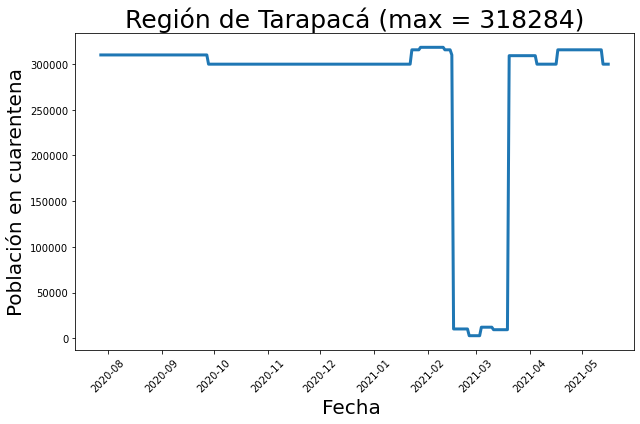

Dias con máximo de personas en cuarentena:
91   2021-01-28
92   2021-01-29
93   2021-01-30
94   2021-01-31
95   2021-02-01
Name: fecha, dtype: datetime64[ns]


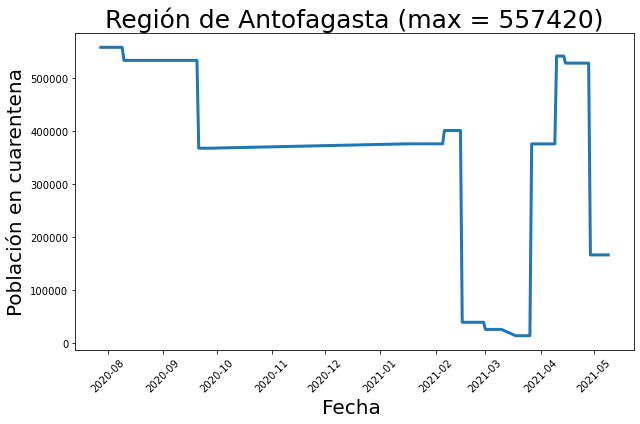

Dias con máximo de personas en cuarentena:
0   2020-07-28
1   2020-07-29
2   2020-07-30
3   2020-07-31
4   2020-08-01
Name: fecha, dtype: datetime64[ns]


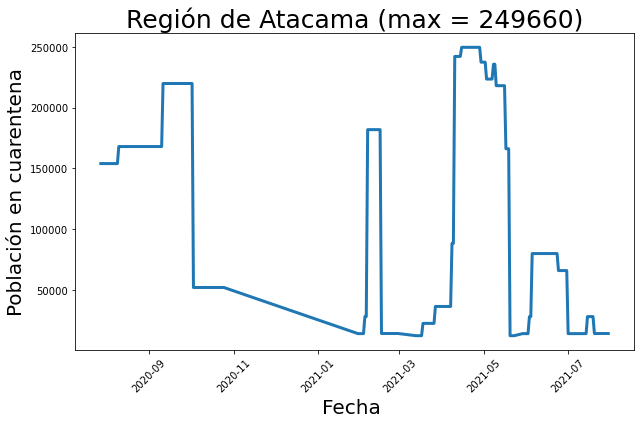

Dias con máximo de personas en cuarentena:
153   2021-04-15
154   2021-04-16
155   2021-04-17
156   2021-04-18
157   2021-04-19
Name: fecha, dtype: datetime64[ns]


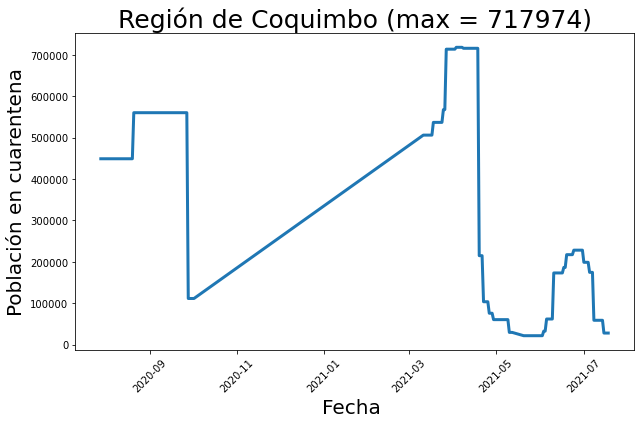

Dias con máximo de personas en cuarentena:
89   2021-04-03
90   2021-04-04
91   2021-04-05
92   2021-04-06
93   2021-04-07
Name: fecha, dtype: datetime64[ns]


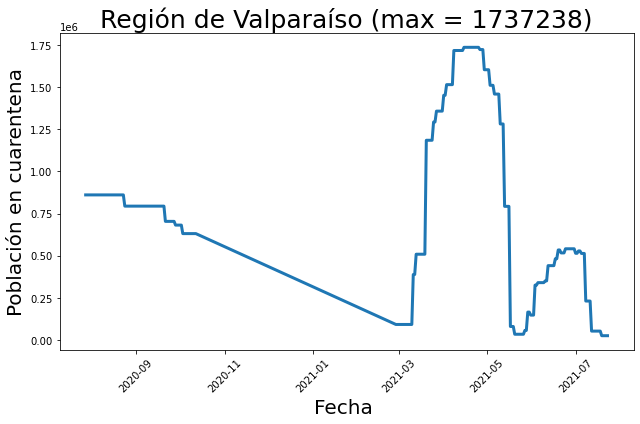

Dias con máximo de personas en cuarentena:
124   2021-04-15
125   2021-04-16
126   2021-04-17
127   2021-04-18
128   2021-04-19
Name: fecha, dtype: datetime64[ns]


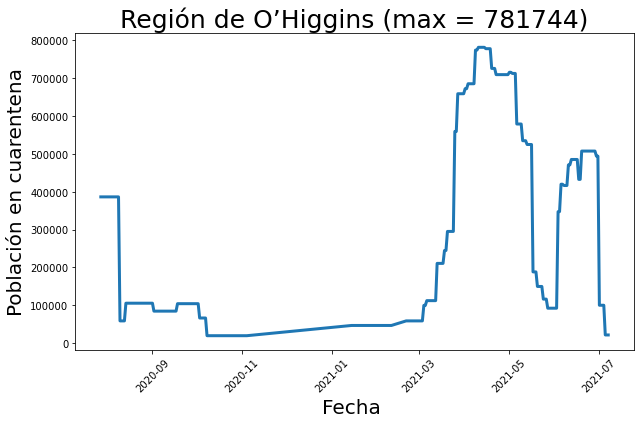

Dias con máximo de personas en cuarentena:
177   2021-04-10
178   2021-04-11
179   2021-04-12
180   2021-04-13
181   2021-04-14
Name: fecha, dtype: datetime64[ns]


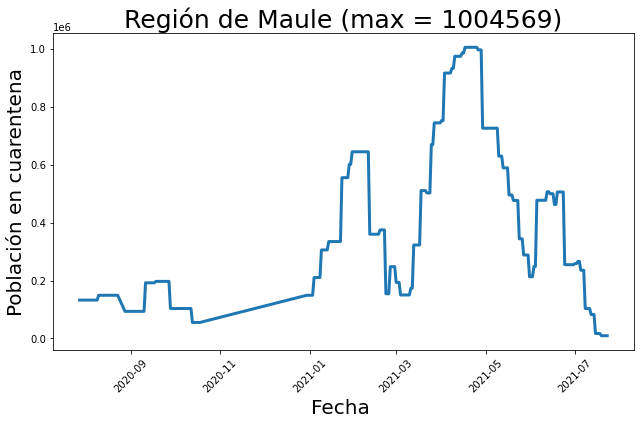

Dias con máximo de personas en cuarentena:
187   2021-04-17
188   2021-04-18
189   2021-04-19
190   2021-04-20
191   2021-04-21
Name: fecha, dtype: datetime64[ns]


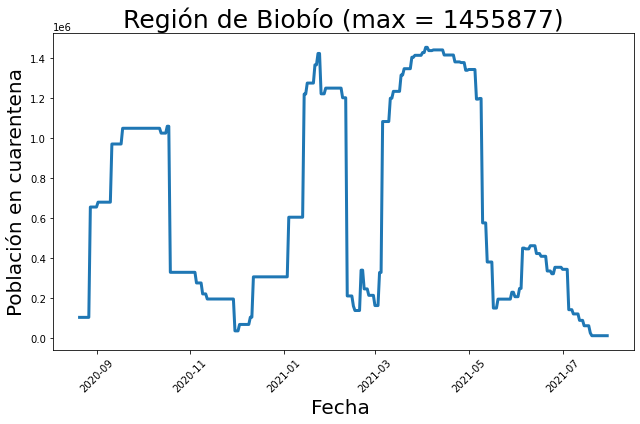

Dias con máximo de personas en cuarentena:
225   2021-04-03
226   2021-04-04
Name: fecha, dtype: datetime64[ns]


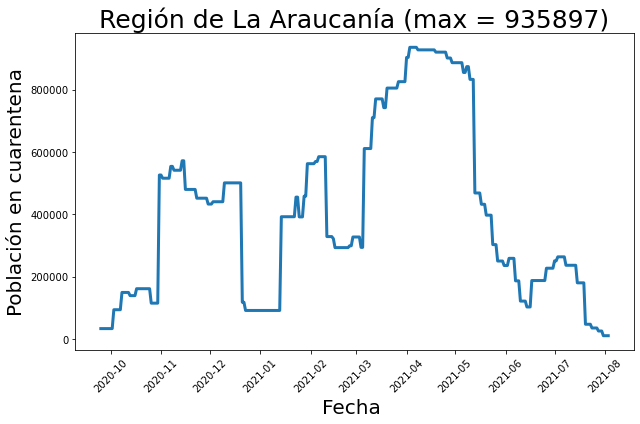

Dias con máximo de personas en cuarentena:
190   2021-04-03
191   2021-04-04
192   2021-04-05
193   2021-04-06
194   2021-04-07
Name: fecha, dtype: datetime64[ns]


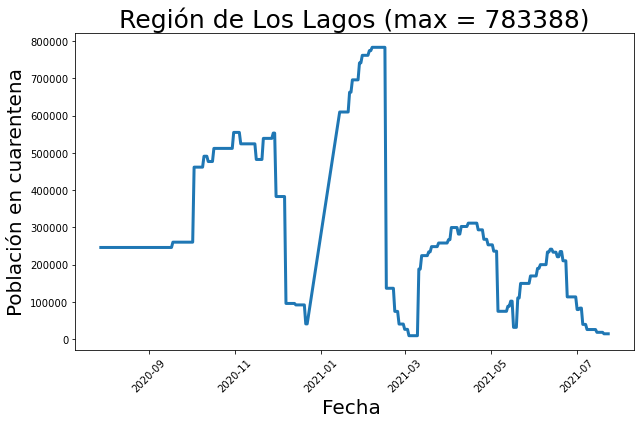

Dias con máximo de personas en cuarentena:
170   2021-02-06
171   2021-02-07
172   2021-02-08
173   2021-02-09
174   2021-02-10
Name: fecha, dtype: datetime64[ns]


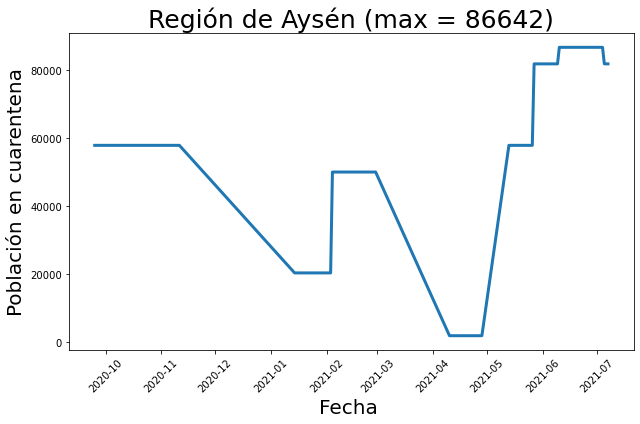

Dias con máximo de personas en cuarentena:
141   2021-06-10
142   2021-06-11
143   2021-06-12
144   2021-06-13
145   2021-06-14
Name: fecha, dtype: datetime64[ns]


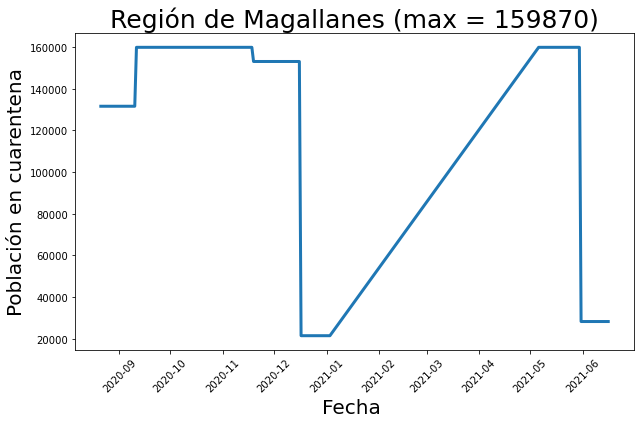

Dias con máximo de personas en cuarentena:
21   2020-09-11
22   2020-09-12
23   2020-09-13
24   2020-09-14
25   2020-09-15
Name: fecha, dtype: datetime64[ns]


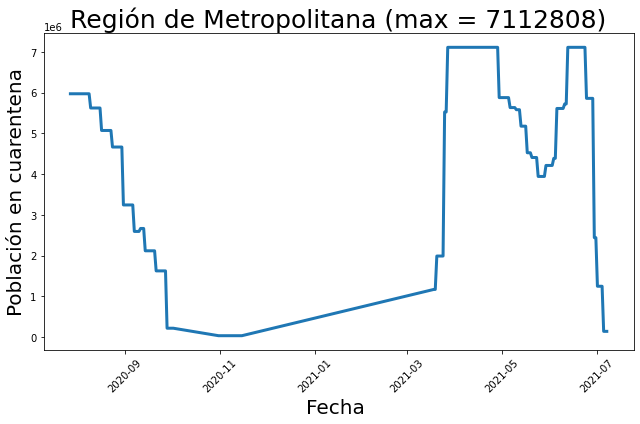

Dias con máximo de personas en cuarentena:
92   2021-03-27
93   2021-03-28
94   2021-03-29
95   2021-03-30
96   2021-03-31
Name: fecha, dtype: datetime64[ns]


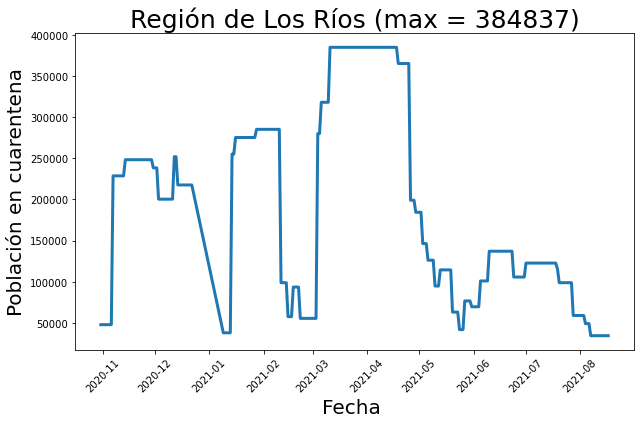

Dias con máximo de personas en cuarentena:
114   2021-03-11
115   2021-03-12
116   2021-03-13
117   2021-03-14
118   2021-03-15
Name: fecha, dtype: datetime64[ns]


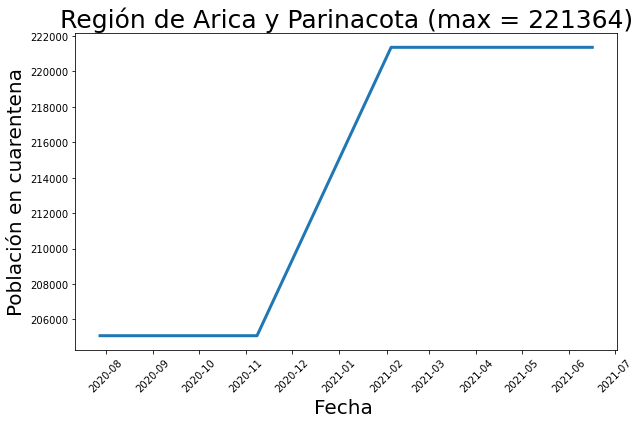

Dias con máximo de personas en cuarentena:
104   2021-02-04
105   2021-02-05
106   2021-02-06
107   2021-02-07
108   2021-02-08
Name: fecha, dtype: datetime64[ns]


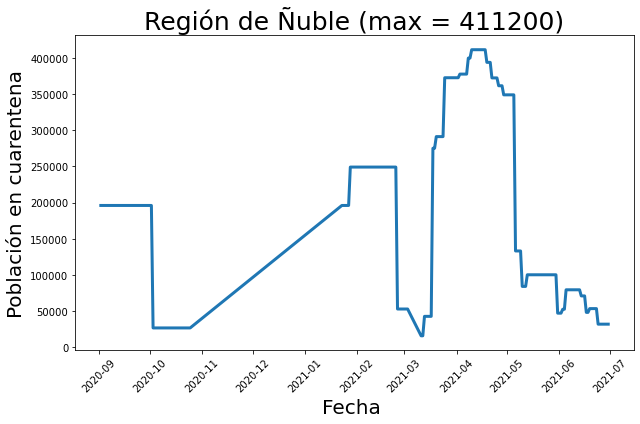

Dias con máximo de personas en cuarentena:
124   2021-04-10
125   2021-04-11
126   2021-04-12
127   2021-04-13
128   2021-04-14
Name: fecha, dtype: datetime64[ns]


In [17]:
for i in range(1,17):
    region_plot(i,df,df_region)

# A nivel país.

In [18]:
def pais_plot(df):
    #data_reg=df.loc[df['cod_region']==x]


    data = df.groupby(['fecha'], as_index= False)['población'].sum() # https://www.codegrepper.com/code-examples/python/how+to+sum+the+revenue+from+every+day+in+a+dataframe+python
   
    plt.rcParams["figure.figsize"] = [12, 8]
    plt.rcParams["figure.autolayout"] = True
    
    plt.plot(data['fecha'], data['población'],linewidth=3 )
    
    n='Personas en cuarentena por día'+' (max = '+data['población'].max().astype(str)+')'
    plt.title(n, fontsize=30)
    plt.ylabel('Población en cuarentena',fontsize=25)
    plt.xlabel('Fecha ',fontsize=25)
    plt.xticks(rotation=45)
    plt.show()
    print('Dias con máximo de personas en cuarentena:')
    print(data.loc[data['población']==data['población'].max()]['fecha'].head())

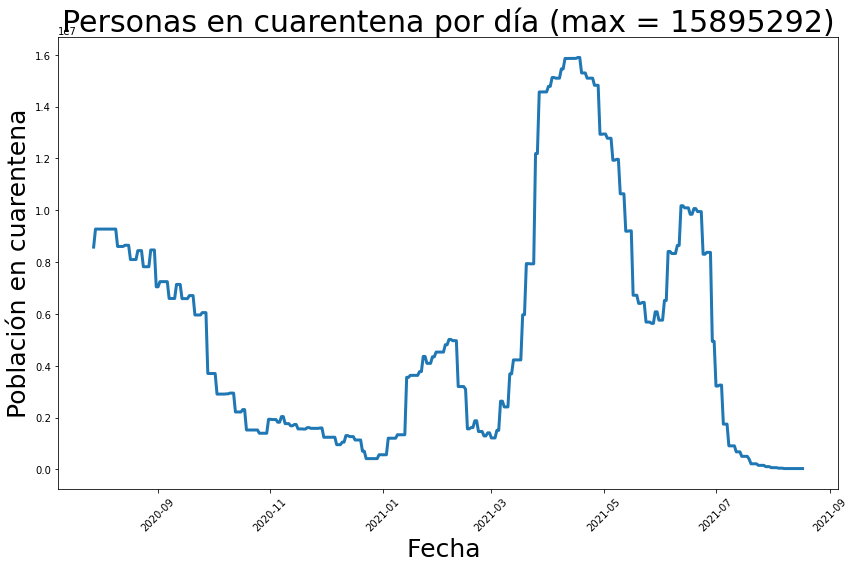

Dias con máximo de personas en cuarentena:
263   2021-04-17
264   2021-04-18
Name: fecha, dtype: datetime64[ns]


In [19]:
pais_plot(df)

# Todas las regiones.

In [20]:
def all_regs_plot(df,dfreg):
    

    plt.rcParams["figure.figsize"] = [13, 8]
    plt.rcParams["figure.autolayout"] = True
    
    for i in range(1,17):
        
        data_reg=df.loc[df['cod_region']==i]
        data = data_reg.groupby(['fecha'], as_index= False)['población'].sum() # https://www.codegrepper.com/code-examples/python/how+to+sum+the+revenue+from+every+day+in+a+dataframe+python
        plt.plot(data['fecha'], data['población'],linewidth=2 ,label=dfreg.loc[dfreg['cod_region']==i]['region'].values[0])
    
    #n='Región de '+dfreg.loc[dfreg['cod_region']==x]['region'].values[0]+' (max = '+data['población'].max().astype(str)+')'
    plt.title('Personas en cuarentena por región', fontsize=25)
    plt.ylabel('Población en cuarentena',fontsize=20)
    plt.xlabel('Fecha ',fontsize=20)
    plt.legend(loc='upper right')
    plt.xticks(rotation=45)
    plt.show()
    

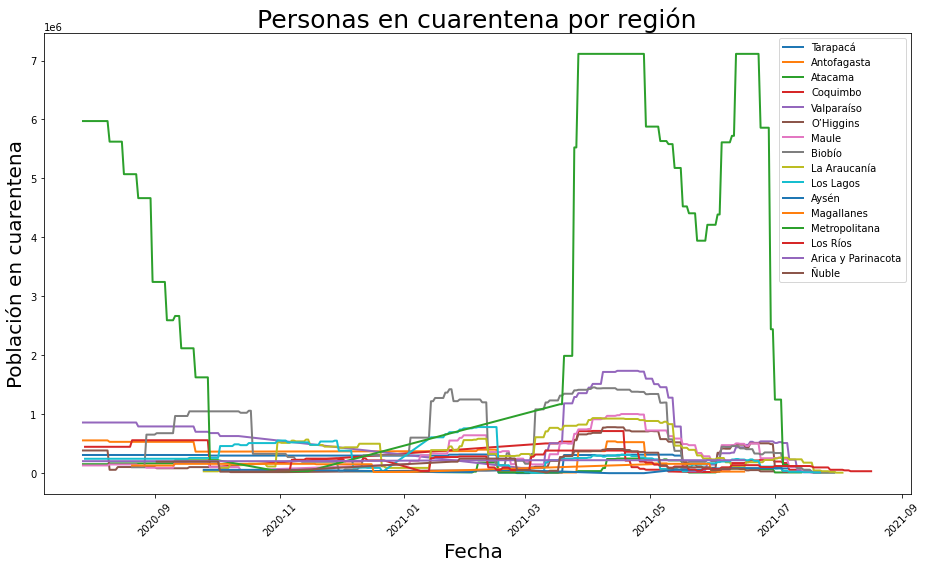

In [21]:
all_regs_plot(df,df_region)